In [1]:

# Importamos librerias necesarias

# Procesamiento de Datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar la linealidad de las relaciones entre variables.
# Analizar las distribuciones de las variables.

import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

# Configuracion
pd.set_option('display.max_columns', None)

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Funcion lectura de ficheros
def read_csv(nombre_fichero):
    """
    Esta función esta diseñada para leer ficheros CSV 

    Args:
        nombre_fichero: un str

    Returns:
        Devuelve el DataFrame
    """
    df = pd.read_csv(nombre_fichero)
    return df

In [3]:
# Antes de comenzar leeremos el fichero csv

df_flight = read_csv("Customer Flight Activity.csv")
df_loyalty =read_csv("Customer Loyalty History.csv")


In [4]:
def exploración_inicial(df, nombre='Tu DataFrame'):
    """
    Función diseñada para proporcionar un resumen detallado de un DataFrame:
    
    - Nombre del DataFrame: Muestra el nombre del DataFrame.
    - Información básica del DataFrame: Muestra la información del tipo de datos para cada columna y la cantidad de valores no nulos.
    - Recuento de filas y columnas: Imprime el número de filas y columnas.
    - Valores nulos: Presenta la cantidad de valores nulos en cada columna.
    - Valores duplicados: Indica la cantidad de filas duplicadas en el DataFrame.
    - Estadísticas descriptivas para columnas numéricas.
    - Estadísticas descriptivas para columnas categóricas.
    
    """
    print(f"Proporcionando un resumen detallado de {nombre}:")
    print("---------------------------------------------------")
    print(f"Las tres primeras filas del DataFrame son:\n{df.head(3)}\n")
    print("---------------------------------------------------------------------------------------------------")
    print(f"Las tres últimas filas del DataFrame son:\n{df.tail(3)}\n")
    print("---------------------------------------------------------------------------------------------------")
    print(f"Información del DataFrame:\n{df.info()}\n")
    print("---------------------------------------------------")
    print(f"Número de filas: {df.shape[0]}, Número de columnas: {df.shape[1]}\n")
    print("---------------------------------------------------")
    print(f"Valores nulos dentro del DataFrame:\n{df.isnull().sum()}\n")
    print("---------------------------------------------------")
    print(f"Datos duplicados dentro del DataFrame: {df.duplicated().sum()}\n")
    print("---------------------------------------------------")
    try:
        print(f"Estadísticas descriptivas para columnas numéricas:\n{display(df.describe().T)}\n")        
        print("------------------------------------------------------------------------")
    except:
        print("No hay columnas numéricas en el DataFrame.")

    try:
        print(f"Estadísticas descriptivas para columnas categóricas:\n{display(df.describe(include='object').T)}\n")
        print("--------------------------------------------------")
    except:
        print("No hay columnas de tipo objeto en el DataFrame.")

In [5]:
#aplico funcion de exploracion a df_flight
exploración_inicial(df_flight, nombre='df_flight')

Proporcionando un resumen detallado de df_flight:
---------------------------------------------------
Las tres primeras filas del DataFrame son:
   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2                            0  

---------------------------------------------------------------------------------------------------
Las tres últimas filas del DataFrame son:
        Lo

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


Estadísticas descriptivas para columnas numéricas:
None

------------------------------------------------------------------------
No hay columnas de tipo objeto en el DataFrame.


In [6]:
#aplico funcion de exploracion a df_loyalty
exploración_inicial(df_loyalty, nombre='df_loyalty')

Proporcionando un resumen detallado de df_loyalty:
---------------------------------------------------
Las tres primeras filas del DataFrame son:
   Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   

  Education   Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor  83236.0        Married         Star  3839.14        Standard   
1   College      NaN       Divorced         Star  3839.61        Standard   
2   College      NaN         Single         Star  3839.75        Standard   

   Enrollment Year  Enrollment Month  Cancellation Year  Cancellation Month  
0             2016                 2                NaN                 NaN  
1             2016                 3                NaN                 NaN 

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


Estadísticas descriptivas para columnas numéricas:
None

------------------------------------------------------------------------


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


Estadísticas descriptivas para columnas categóricas:
None

--------------------------------------------------


In [7]:
def exploracion_columnas(df, nombre='Tu DataFrame'):
    
    """ Función diseñada para realizar una exploración detallada de cada columna del DataFrame:
    
       - Nombre de la columna
       - Número de datos: Total de datos en la columna.
       - Frecuencia de valores: Frecuencia de cada valor en la columna.
       - Cantidad de valores únicos: Indica cuántos valores únicos hay en la columna.
       - Tipo de datos: Muestra el tipo de datos de la columna.
       - Valores nulos: Imprime la cantidad de valores nulos en la columna.
       - Valores duplicados: Indica la cantidad de valores duplicados en la columna.
       
    """
    
    print(f" ---------{nombre}---------\n")
    
    for columna in df.columns:
        
        print(f"\n----------- ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------")
        print("------------------------------------------------------------------------")
        print(f"Número de registros de  datos: {len(df[columna].to_list())}")
        print("------------------------------------------------------------------------")
        print(f"Frecuencia de valores en la columna:\n{df[columna].value_counts()}")
        print("------------------------------------------------------------------------")
        print(f"Registros de datos únicos en la columna: {len(df[columna].unique())}")
        print("------------------------------------------------------------------------")
        print(f"Tipo de datos de los valores: {df[columna].dtypes}")
        print("------------------------------------------------------------------------")
        print(f"Suma de valores nulos: {df[columna].isnull().sum()}")
        print("------------------------------------------------------------------------")
        print(f"Suma de valores duplicados: {df[columna].duplicated().sum()}")
        print('---------------------------------------------------------------------------')
        

In [8]:
exploracion_columnas(df_loyalty,'df_loyalty')

 ---------df_loyalty---------


----------- ANALIZANDO LA COLUMNA: 'LOYALTY NUMBER' -----------
------------------------------------------------------------------------
Número de registros de  datos: 16737
------------------------------------------------------------------------
Frecuencia de valores en la columna:
Loyalty Number
480934    1
208485    1
455896    1
469781    1
533488    1
         ..
922188    1
780529    1
721438    1
761015    1
652627    1
Name: count, Length: 16737, dtype: int64
------------------------------------------------------------------------
Registros de datos únicos en la columna: 16737
------------------------------------------------------------------------
Tipo de datos de los valores: int64
------------------------------------------------------------------------
Suma de valores nulos: 0
------------------------------------------------------------------------
Suma de valores duplicados: 0
------------------------------------------------------------------

In [9]:
exploracion_columnas(df_flight,'df_flight')

 ---------df_flight---------


----------- ANALIZANDO LA COLUMNA: 'LOYALTY NUMBER' -----------
------------------------------------------------------------------------
Número de registros de  datos: 405624
------------------------------------------------------------------------
Frecuencia de valores en la columna:
Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64
------------------------------------------------------------------------
Registros de datos únicos en la columna: 16737
------------------------------------------------------------------------
Tipo de datos de los valores: int64
------------------------------------------------------------------------
Suma de valores nulos: 0
------------------------------------------------------------------------
Suma de valores duplicados: 388887
--------------------------------------------------

In [10]:
def comprobacion_valores_nulos(df):
    """Tomamos un DF como entrada, y revisamos el % de Nulos por columna
        Filtramos para mostrar el % de nulos en las columnas que los contengan"""
    
    # calculamos el % de nulos por columna
    df_nulos = pd.DataFrame((df.isnull().sum() / df.shape[0]) * 100, columns = ["%_nulos"])
    # filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
    
    return df_nulos.round(2)[df_nulos["%_nulos"] > 0]

In [11]:
print(f'los valores nulos de df_loyalty son: {comprobacion_valores_nulos(df_loyalty)}')
print("------------------------------------------------------------------------------")
print(f'los valores nulos de df_flight son: {comprobacion_valores_nulos(df_flight)}')
print("------------------------------------------------------------------------------")

los valores nulos de df_loyalty son:                     %_nulos
Salary                25.32
Cancellation Year     87.65
Cancellation Month    87.65
------------------------------------------------------------------------------
los valores nulos de df_flight son: Empty DataFrame
Columns: [%_nulos]
Index: []
------------------------------------------------------------------------------


In [12]:
# df_flight.columns = [col.lower().strip().replace(" ","_") for col in df_flight.columns]
# print(f"Se ha cambiado el nombre en las columnas del  df_flight, actualmente son:\n{list(df_flight.columns)}\n")

# df_loyalty.columns = [col.lower().strip().replace(" ","_") for col in df_loyalty.columns]
# print(f"Se ha cambiado el nombre en las columnas del  df_loyalty, actualmente son:\n{list(df_loyalty.columns)}\n")

In [13]:
def cambio_nombres_columnas(dataframe, nombre=None):
    """
    Args:
        -dataframe: Recibe el DataFrame al que se aplicará la función.
        -nombre: El nombre asociado al DataFrame (opcional).
    
    Esta función cambia los nombres de las columnas del DataFrame.
    Recibimos un mensaje de confirmación con el nombre del DataFrame y los nuevos nombres de las columnas.
    """

    if nombre is None:
        nombre = 'Tu DataFrame'
    dataframe.columns = [col.title().strip().replace(" ", "_") for col in dataframe.columns]
    print(f"Los nombres de las columnas en  {nombre} han sido actualizados a \n{list(dataframe.columns)}\n")

In [14]:
# Aplico funcion cambio de nombres

cambio_nombres_columnas(df_loyalty,'df_loyalty')
print("------------------------------------------------------------------------------")
cambio_nombres_columnas(df_flight,'df_flight')
print("------------------------------------------------------------------------------")

Los nombres de las columnas en  df_loyalty han sido actualizados a 
['Loyalty_Number', 'Country', 'Province', 'City', 'Postal_Code', 'Gender', 'Education', 'Salary', 'Marital_Status', 'Loyalty_Card', 'Clv', 'Enrollment_Type', 'Enrollment_Year', 'Enrollment_Month', 'Cancellation_Year', 'Cancellation_Month']

------------------------------------------------------------------------------
Los nombres de las columnas en  df_flight han sido actualizados a 
['Loyalty_Number', 'Year', 'Month', 'Flights_Booked', 'Flights_With_Companions', 'Total_Flights', 'Distance', 'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed']

------------------------------------------------------------------------------


In [15]:
# df_merge = pd.merge(df_flight,df_loyalty, left_on='Loyalty Number', right_on='Loyalty Number', how='inner')
# df_merge.head()

In [16]:
def union_datos(df1, df2, col_union_left, col_union_right, union_type="left"):
    """
        Combina dos DataFrames y guarda el resultado en un archivo CSV.

        Args:
        - df1: DataFrame izquierdo.
        - df2: DataFrame derecho.
        - col_union_left: Nombre de la columna en el DataFrame izquierdo para la combinación.
        - col_union_right: Nombre de la columna en el DataFrame derecho para la combinación.
        - Union_type: Tipo de combinación a realizar (por defecto es "left").
    """
    try:
        df_merged = df1.merge(df2, left_on=col_union_left, right_on=col_union_right, how= union_type)
        df_merged.to_csv('merged.csv')
        return df_merged
    except Exception:
        
        return None

In [17]:
union_datos(df_flight,df_loyalty, 'Loyalty_Number', 'Loyalty_Number','left')

,Loyalty_Number,Year,Month,Flights_Booked,Flights_With_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,Clv,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
405620,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
405621,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
405622,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [18]:
# importo el archivo resultante del merge

df_loyalty_flight = read_csv('merged.csv')

In [19]:
comprobacion_valores_nulos(df_loyalty_flight)


,%_nulos
Salary,25.31
Cancellation_Year,87.66
Cancellation_Month,87.66


In [45]:
def eliminar_columnas(df, columns_to_drop):
     """
        Removes the specified columns from a DataFrame.
    
        Args:
        df (pd.DataFrame): The original DataFrame.
        columns_to_drop (list): List of column names to drop.
    
        Returns:
            pd.DataFrame: The updated DataFrame without the specified columns.
    """
     return df.drop(columns_to_drop, axis=1)



In [21]:
# # Con un porcentaje de nulos tan alto como 87.65% la falta de datos en esa columna es demasiado alta para que sea útil. 
# # Por lo que se decide eliminar las columnas 'Cancellatio_year' y 'Cancellation Month'

df_loyalty_flight = eliminar_columnas(df_loyalty_flight,['Cancellation_Year','Cancellation_Month'])


In [22]:
def llenar_nulos_con_media(df, nombre_columna):
    """
    Rellena los valores NaN en la columna especificada con el valor medio de esa columna.
    
    Args:
        df (pd.DataFrame): El DataFrame.
        nombre_columna (str): Nombre de la columna a rellenar.
    
    Returns:
        pd.DataFrame: El DataFrame actualizado.
    """
    df[nombre_columna].fillna(df[nombre_columna].mean(), inplace=True)
    
    
    return df

In [23]:
# # Para gestionar el 25% de nulos de la columna "salary" se podrían imputarlos con la media
llenar_nulos_con_media(df_loyalty_flight,'Salary')

,Unnamed: 0,Loyalty_Number,Year,Month,Flights_Booked,Flights_With_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,Clv,Enrollment_Type,Enrollment_Year,Enrollment_Month
0,0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8
1,1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79268.825953,Single,Nova,2887.74,Standard,2013,3
2,2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79268.825953,Divorced,Nova,2838.07,Standard,2016,7
3,3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8
4,4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,405619,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79268.825953,Married,Aurora,7290.07,Standard,2014,5
405620,405620,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.000000,Single,Nova,8564.77,Standard,2012,8
405621,405621,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.000000,Married,Nova,20266.50,Standard,2017,7
405622,405622,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,79268.825953,Married,Star,2631.56,Standard,2018,7


## VISUALIZACIÓN 

In [24]:
import matplotlib.pyplot as plt

def crear_grafico_lineal_personalizado(x_valores, y_valores, etiqueta_x, etiqueta_y, titulo, etiquetas_eje_x=None, marcador='D', estilo_linea=':', color='blue'):
    """
    Crea un gráfico de líneas personalizable.

    Args:
        x_valores : Valores del eje x.
        y_valores : Valores del eje y.
        x_lavel (str): Etiqueta para el eje x.
        y_label (str): Etiqueta para el eje y.
        titulo (str): Título para el gráfico.
        
        marker (str): Estilo de marcador (por defecto: 'D').
        linestyle (str): Estilo de línea (por defecto: ':').
        color (str): Color de la línea (por defecto: 'blue').
        ______________________________________Opcional_____________________________________
        xticks (lista o None): Etiquetas personalizadas para las marcas del eje x (opcional).

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x_valores, y_valores, marker=marcador, linestyle=estilo_linea, color=color)

    # Personalizar etiquetas de los ejes y agregar un título
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)

    if etiquetas_eje_x:
        plt.xticks(range(1, len(etiquetas_eje_x) + 1), etiquetas_eje_x)

    plt.grid(True)
    plt.show()


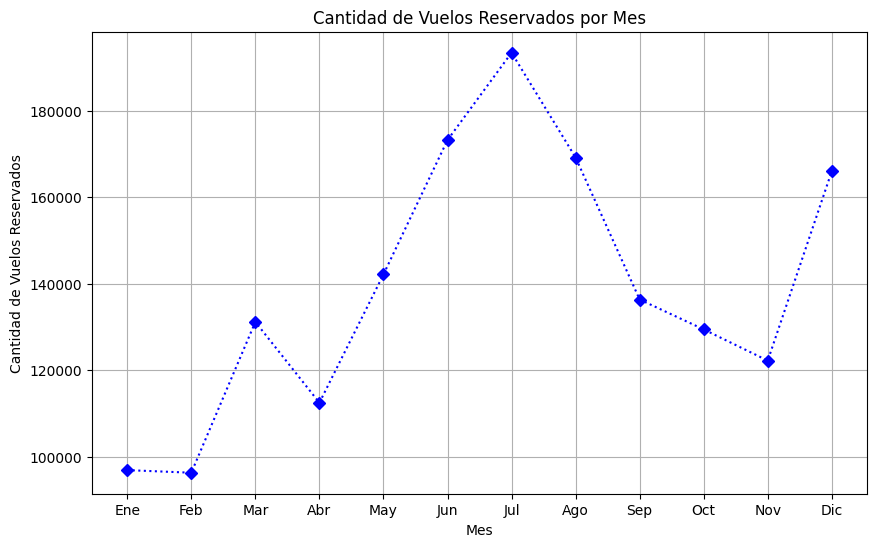

In [25]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

# Se agrupan los datos por mes y se suman la cantidad de vuelos reservados

vuelos_por_mes = df_loyalty_flight.groupby('Month')['Flights_Booked'].sum()

# Crear el gráfico 
crear_grafico_lineal_personalizado(vuelos_por_mes.index, vuelos_por_mes.values,'Mes','Cantidad de Vuelos Reservados','Cantidad de Vuelos Reservados por Mes',['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], marcador='D', estilo_linea=':',color = 'blue')


Pregunta:

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Respuesta:

El gráfico  muestra la  distribución de la cantidad de vuelos reservados a lo largo del año, lo que permite identificar patrones estacionales o tendencia en la cantidad de reservas segun la epoca del año:

* En Semana Santa (Marzo).
* En  verano ( Junio a Agosto), siendo el marcador más alto en **Julio**.
* En  Navidades (Diciembre).

In [26]:
def crear_grafico_dispersion(x_col, y_col, datos, etiqueta_x, etiqueta_y, titulo):
    """
    Crea un gráfico de dispersión con una línea de regresión.

    Args:
        x_col (str): Nombre de la columna para el eje x.
        y_col (str): Nombre de la columna para el eje y.
        datos (pd.DataFrame): DataFrame que contiene los datos relevantes.
        etiqueta_x (str): Etiqueta para el eje x.
        etiqueta_y (str): Etiqueta para el eje y.
        titulo (str): Título para el gráfico.

    Returns:
        None
    """
    # Configurar el estilo de Seaborn (opcional)
    sns.set_style('darkgrid')
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

    # Crear un gráfico de dispersión con línea de regresión
    sns.regplot(x=x_col, y=y_col, data=datos)

    # Personalizar etiquetas de los ejes y agregar un título
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.title(titulo)
    plt.show()


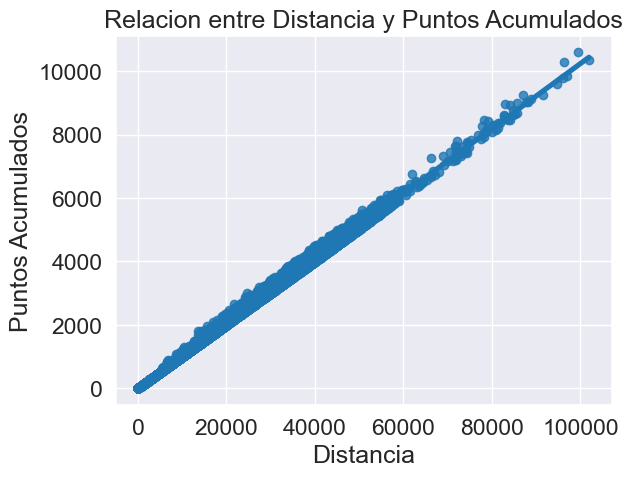

In [27]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

#Para esta pregunta usamos la tabla final_limpia ya que tenemos toda la informacion necesaria
#.sum() calcula la suma de los valores en 'Distance', 'Points Accumulated'  para cada grupo.
#.reset_index() reinicia los índices del DataFrame resultante.

distancia_puntos = df_loyalty_flight.groupby('Loyalty_Number')[['Distance', 'Points_Accumulated']].sum().reset_index()
distancia_puntos

# Creamos el scatter plot
crear_grafico_dispersion("Distance","Points_Accumulated" , distancia_puntos, 'Distancia', 'Puntos Acumulados', "Relacion entre Distancia y Puntos Acumulados")


Pregunta:

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

Respuesta:

* El gráfico muestra la relación entre la distancia de los vuelos y los puntos acumulados por los clientes. 

* **Vemos que hay una correlacion lineal** entre la distancia y los puntos lo cual haciendo la correlación vemos que es positiva (cuando la distancia aumenta los puntos también) * Las personas que viajan mas y mas lejos acumulan mas puntos.



In [28]:
def crear_grafico_barras(dataframe,x_column = None, y_column= None,x_label=None, y_label=None,hue_column=None,title=None,kind='bar',color=['b','c']):
    """
    Crea un gráfico de barras apiladas utilizando los datos de un DataFrame.

    Args:
        dataframe (pandas.DataFrame): DataFrame con los datos.
        x_column(str, opcional):columna eje x
        y_column(str,opcional):columna eje y
        x_label(str): poner etiqueta del eje x
        y_label(str): poner etiqueta del eje x
        title (str)_titulo del gráfico
        kind(str): para especificar el tipo de gráfico que deseas crear.Default bar
        color(list, optional): colores para las barras. Si no se proporciona, se usarán colores predeterminados.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    dataframe.plot(x=x_column, y=y_column,kind=kind, color= color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

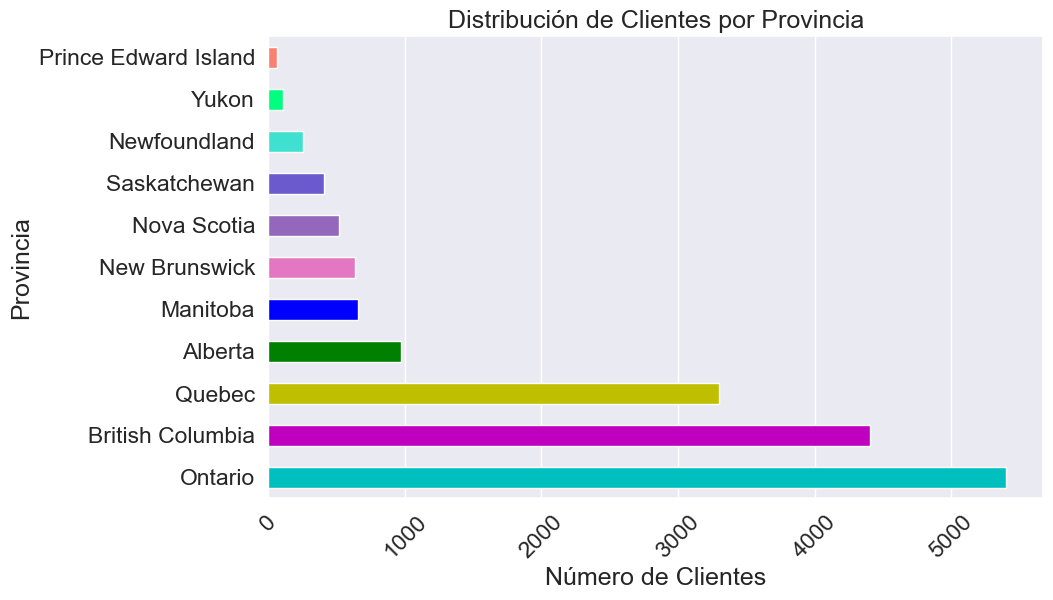

In [29]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?

# Contamos el número de clientes por provincia
clientes_x_provincia = df_loyalty['Province'].value_counts()

# Aplico función gráfico de barras
crear_grafico_barras(clientes_x_provincia,x_label='Número de Clientes', y_label='Provincia',hue_column=None,title='Distribución de Clientes por Provincia',kind='barh',color=['c','m','y','g','b','tab:pink','tab:purple','slateblue','turquoise','springgreen','salmon'])

Pregunta:

3. ¿Cuál es la distribución de los clientes por provincia o estado?

Respuesta:

* El gráfico resultante muestra la distribución de los clientes por provincia, lo que permite identificar:

    - las provincias con mayor  y menor cantidad de  clientes. En este caso  **Ontario** es la provincia con mayor cantidad de cliente. 

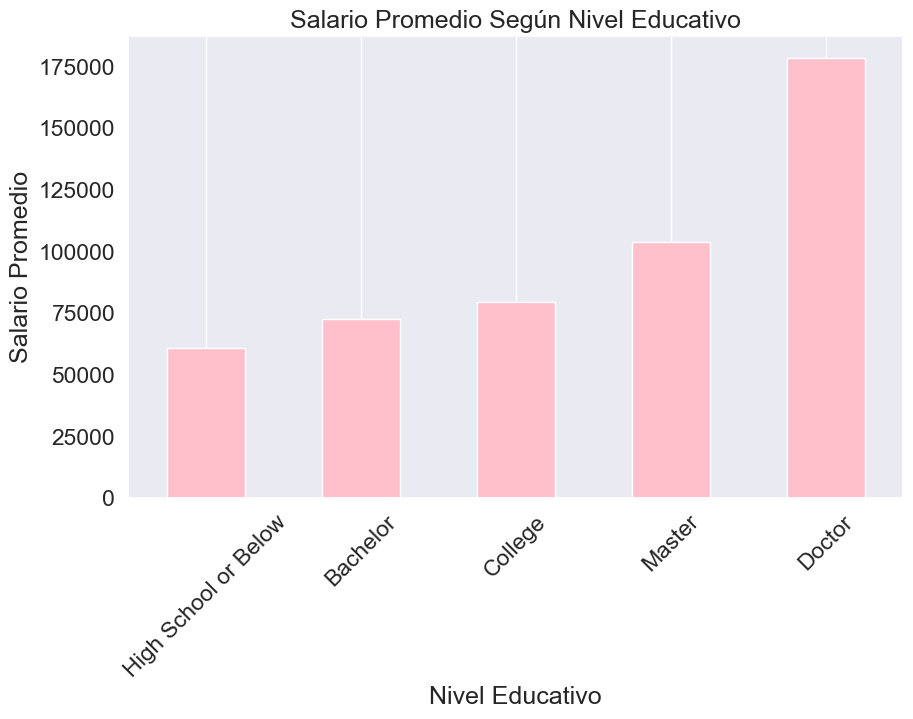

In [30]:
# 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

# Agrupamos los datos por nivel educativo y se saca la media al salario
Salario_x_nivel_educativo = df_loyalty_flight.groupby('Education')['Salary'].mean().sort_values()

# aplico funcion grafico de barras
crear_grafico_barras(Salario_x_nivel_educativo,x_label='Nivel Educativo', y_label='Salario Promedio', title='Salario Promedio Según Nivel Educativo',color='pink')

Pregunta:

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Respuesta: 

* El gráfico muestra una comparacion del salario promedio entre los diferentes niveles educativos  

   - Permite identificar las diferencias en el rango salarial segun nivel educativo. 
   
   - Se  observa una relación proporcional entre las variables, a mayor nivel educativo mayor salario promedio.

In [31]:
# Función crear gráfico pie

def crear_grafico_pie(dataframe,title):
    """
    Crea un gráfico de pastel utilizando los datos de un DataFrame.

    Args:
        dataframe (pandas.DataFrame): DataFrame con los datos.
        column_name (str): Nombre de la columna con los valores para el gráfico de pastel.
        colors (list, optional): Lista de colores para las secciones del pastel.
        explode (list, optional): Lista de valores para resaltar secciones del pastel.

    Returns:
        None
    """
    plt.figure(figsize=(6, 6))
    plt.pie(dataframe, labels=dataframe.index, autopct='%1.1f%%', startangle=140,
            colors=['c','m','b'], explode=( 0.05 ,0, 0.08) , textprops={'color': 'black'})
    plt.title(title, color="black")
    plt.axis('equal')  # Aspecto igual para asegurar que el pastel se dibuje como un círculo
    plt.legend(loc='lower right')  # Añadir leyenda
    plt.show()

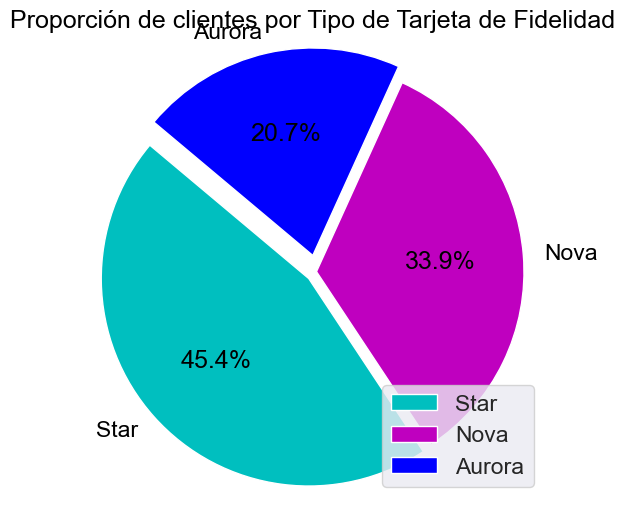

In [32]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

# Contar el número de clientes por tipo de tarjeta de fidelidad
clientes_x_tipo_tarjeta = df_loyalty_flight['Loyalty_Card'].value_counts()
crear_grafico_pie(clientes_x_tipo_tarjeta,'Proporción de clientes por Tipo de Tarjeta de Fidelidad')

Pregunta:

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Respuesta: 

* El gráfico muestra la proporción de clientes por cada tipo de tarjeta. 
  -Permite identificar la tarjeta  más común entre los clientes, **Star**.


<Figure size 1000x600 with 0 Axes>

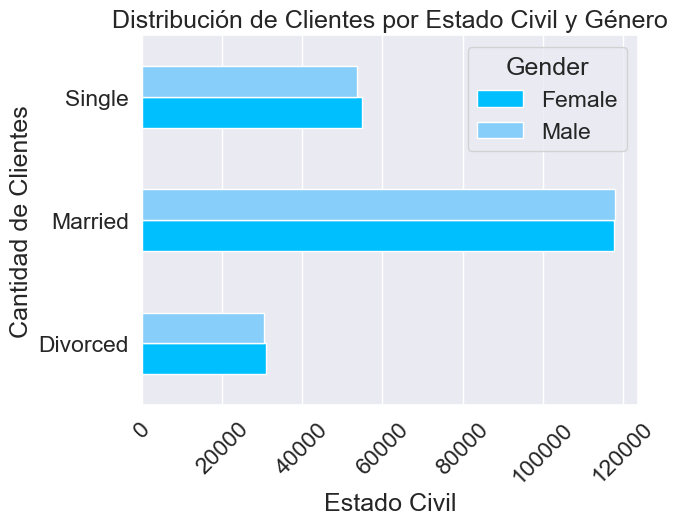

In [33]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

# Crear un DataFrame que contenga la cantidad de clientes por estado civil y género
clientes_x_estado_civil_genero = df_loyalty_flight.groupby(['Marital_Status', 'Gender']).size().unstack()
crear_grafico_barras(clientes_x_estado_civil_genero,x_label='Estado Civil', y_label='Cantidad de Clientes', title='Distribución de Clientes por Estado Civil y Género',kind='barh',color=['deepskyblue','lightskyblue'])

Pregunta:

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

Respuesta: 

* El gráfico muestra la distribución de los clientes según su estado civil y género.

   - Observamos que hay predomina el numero de clientes casados, seguido de los divorciados, y la menor cantidad de        clientes que estan divorciados.
   - También observamos que los clientes que estan casados es proporcional para ambos generos.

## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

***1.Preparación de Datos:***

* Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [34]:
# Selecciono  las columnas relevantes
df_diferences = df_loyalty_flight[['Flights_Booked', 'Education']]

***2.Análisis Descriptivo:***

* Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas como:
  - El promedio
  - La desviación estandar
  - Los percentiles del número de vuelos reservados para cada grupo.

In [35]:

df_education_level = df_diferences.groupby('Education')

# Calcular estadísticas descriptivas básicas para el número de vuelos reservados por grupo educativo
df_description_c = df_education_level['Flights_Booked'].describe().reset_index()

df_description_c

,Education,count,mean,std,min,25%,50%,75%,max
0,Bachelor,253752.0,4.091093,5.216995,0.0,0.0,1.0,8.0,21.0
1,College,102672.0,4.153012,5.242136,0.0,0.0,1.0,8.0,21.0
2,Doctor,17856.0,4.146281,5.250093,0.0,0.0,1.0,8.0,21.0
3,High School or Below,19008.0,4.155777,5.234551,0.0,0.0,1.0,8.0,21.0
4,Master,12336.0,4.184014,5.210294,0.0,0.0,1.0,8.0,21.0


***3. Prueba Estadística:***

* Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

***Planteamiento de las hipótesis:***

* ***Hipótesis nula (H0):*** No hay diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.


* ***Hipótesis alternativa (H1):*** Hay diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Si  p-value <  0.05, rechazamos la hipótesis nula y concluimos que hay una diferencia significativa  en el número de vuelos reservados entre los diferentes niveles educativos. 

Si p-value >  0.05, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa  en el número de vuelos reservados entre los diferentes niveles educativos.

In [36]:
def crear_grafico_barras_pallete(datos, x_column, y_column, hue_column=None,figsize=(10, 6), x_label=None, y_label=None, title=None, x_rotation=0):
    """
    Crea un gráfico de barras personalizado.

    Args:
        -  datos (pd.DataFrame): DataFrame con los datos.
        -  x_column (str): Nombre de la columna para el eje x.
        -  y_column (str): Nombre de la columna para el eje y.
       
        ___________________________ parametros opcionales_______________________________________________________________________
        
        -  hue_column (str): Nombre de la columna para el agrupamiento por color (si es necesario). Default: None.
        -  palette: (str) parámetro  para el color. Default = 'set2'
        -  figsize (tuple): Tamaño de la figura (ancho x alto). Default: (10, 6).
        -  x_label (str): Etiqueta para el eje x. Default: None.
        -  y_label (str): Etiqueta para el eje y. Default: None.
        -  title (str): Título del gráfico. Default: None.
        -  x_rotation (int): Ángulo de rotación de las etiquetas del eje x. Default = 0.

    """
    plt.figure(figsize=figsize)

    sns.barplot(x=x_column, y=y_column, data=datos, hue=hue_column, palette='Set2')

    if x_label:
        plt.xlabel(x_label)
    if y_label:
        plt.ylabel(y_label)
    if title:
        plt.title(title)

    plt.xticks(rotation=x_rotation)
    plt.show()



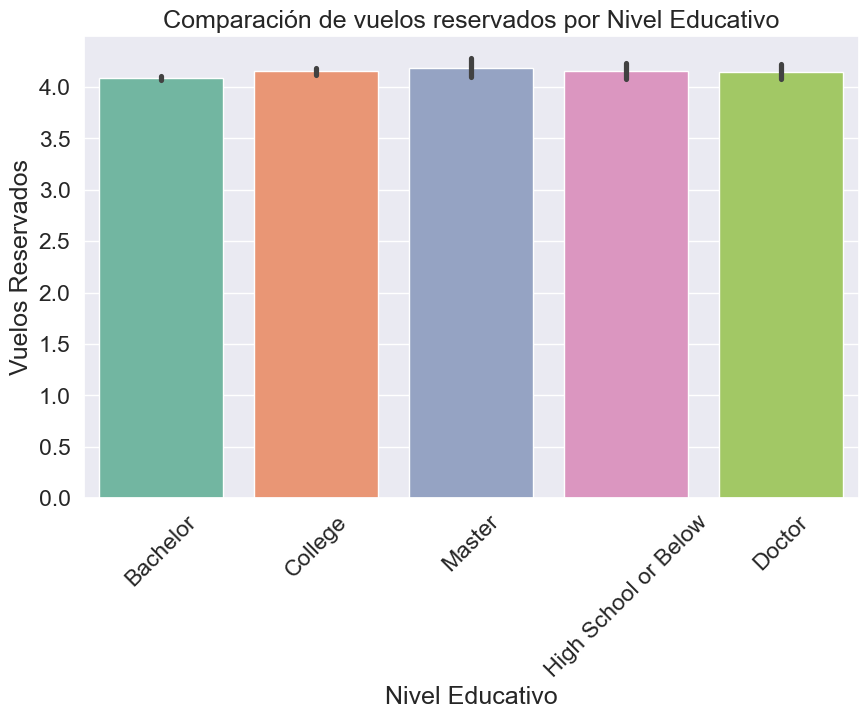

In [37]:
# # Realizo grafico para empezar a entender la distribucion de los datos a nivel visual

crear_grafico_barras_pallete(df_diferences, x_column='Education', y_column='Flights_Booked',hue_column='Education', x_label='Nivel Educativo', y_label='Vuelos Reservados', title='Comparación de vuelos reservados por Nivel Educativo', x_rotation=45)

In [38]:
# Primero realizo un test de normalidad pra ver como se comportan los datos de la columna numerica 

def test_shapiro(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")     

In [39]:
test_shapiro(df_diferences,'Flights_Booked')

Para la columna Flights_Booked los datos no siguen una distribución normal.


### Realizo pruebas de T-test:
- Asume normalidad

In [40]:
def realizar_ttest(grupo_1, grupo_2):
    """
    Realiza el test t de Student independiente entre dos grupos.

    Args:
        grupo_1 : Datos del primer grupo.
        grupo_2 : Datos del segundo grupo.
        equal_var : Controla si se asume igualdad o no igualdad de las varianzas entre los dos grupos. Default = False
        

    Returns:
        str: Resultado e interpretación del test.
    """
    resultado_ttest = ttest_ind(grupo_1, grupo_2,equal_var=False)

    if resultado_ttest.pvalue < 0.05:
        return print("Rechazamos la hipótesis nula y concluimos que *** HAY *** una diferencia significativa entre los grupos.")
    
    else:
        return print("Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.")

In [41]:

# Obtener muestras de cada nivel educativo
bachelor_flights = df_diferences[df_diferences["Education"] == "Bachelor"]["Flights_Booked"]
college_flights = df_diferences[df_diferences["Education"] == "College"]["Flights_Booked"]
doctor_flights = df_diferences[df_diferences["Education"] == "Doctor"]["Flights_Booked"]
highschool_flights = df_diferences[df_diferences["Education"] == "High School or Below"]["Flights_Booked"]
master_flights = df_diferences[df_diferences["Education"] == "Master"]["Flights_Booked"]

df_list = [bachelor_flights, college_flights, doctor_flights, highschool_flights, master_flights]
name_list = ["Bachelor", "College", "Doctor", "Hightschool", "Master"]

# creo un bucle for para iterar y hacer comparaciones 
for i in range(len(df_list)):
    for j in range(i+1, len(df_list)): #permite comparar todas las combinaciones posibles de grupos dos a dos.
        
        # Realizar la prueba t de Student
        resultado_ttest_1  = realizar_ttest(df_list[i], df_list[j])
       

Rechazamos la hipótesis nula y concluimos que *** HAY *** una diferencia significativa entre los grupos.
Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.
Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.
Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.
Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.
Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.
Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.
Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.
Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.
Aceptamos la hipótesis nula y c

In [42]:
# Definir los grupos específicos de nivel educativo
grupo_1 = ['Bachelor', 'College','High School or Below']
grupo_2 = ['Master', 'Doctor']

# Obtener los datos de vuelos reservados para cada grupo
grupo_1_vuelos = df_diferences[df_diferences['Education'].isin(grupo_1)]['Flights_Booked']
grupo_2_vuelos = df_diferences[df_diferences['Education'].isin(grupo_2)]['Flights_Booked']

# Realizar la prueba t de Student independiente

resultado_ttest = realizar_ttest(grupo_1_vuelos, grupo_2_vuelos)


Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.


### Realizo test de Mann-Whitney 

* Similar al t-test independiente, pero no asume normalidad en los datos.


In [43]:
def prueba_mann_whitney(grupo_1, grupo_2):
    """
    Realiza la prueba de Mann-Whitney U entre dos grupos.

    Args:
        grupo_1 : Datos del primer grupo.
        grupo_2 : Datos del segundo grupo.

    Returns:
        str: Resultado e interpretación de la prueba.
    """
    resultado = mannwhitneyu(grupo_1, grupo_2)

    if resultado.pvalue < 0.05:
        return print("Rechazamos la hipótesis nula y concluimos que *** HAY *** una diferencia significativa entre los grupos.")
    
    else:
        return print("Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.")

In [44]:
# Definir los grupos específicos de nivel educativo
# retiro college ya que al tener una diferencia con el de bacherlor me desecha la hipotesis nula.
grupo_1 = ['Bacherlor', 'High School or Below']
grupo_2 = ['Master', 'Doctor']

# Obtener los datos de vuelos reservados para cada grupo
grupo_1_vuelos = df_diferences[df_diferences['Education'].isin(grupo_1)]['Flights_Booked']
grupo_2_vuelos = df_diferences[df_diferences['Education'].isin(grupo_2)]['Flights_Booked']

# Realizar la prueba t de Student independiente

resultado_manwhitney_1 = prueba_mann_whitney(grupo_1_vuelos, grupo_2_vuelos)


Aceptamos la hipótesis nula y concluimos que *** No *** hay una diferencia significativa  entre los grupos.


Coclusion: 
        Despues de Analizar los datos de manera visual y atraves de aplicar ttest y Mann-Whitney U test, se Acepta la hipotesis nula ya que no hay una diferencia significativa de vuelos reservados segun el nivel educativo de los clientes de aerolinea.